In [1]:
import numpy as np
import random
import cv2
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
import sys; sys.path.insert(0, '..')
from src.data.make_dataset import *
from src.features.build_features import *
from src.models import predict_model, train_model
from src.visualization.visualize import *

In [3]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10571894350229925213
xla_global_id: -1
]


In [5]:
def imshow(a):
    a = cv2.normalize(a, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    a = a.astype(np.uint8)
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(a))

In [6]:
random.seed(0)

In [7]:
X, y = preprocess(generate_dataset(10000))
print(X.shape, y.shape)

(10000, 64, 64, 1) (10000, 4)


In [8]:
from tensorflow import keras

In [9]:
model = train_model.make_model()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 average_pooling2d (AverageP  (None, 31, 31, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 14, 14, 64)       0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
model, history = train_model.compile_and_train(model, X, y)

Epoch 1/100
32/32 [==============================] - 26s 800ms/step - loss: 0.2753 - val_loss: 0.2134
Epoch 2/100
32/32 [==============================] - 28s 868ms/step - loss: 0.1792 - val_loss: 0.1519
Epoch 3/100
32/32 [==============================] - 28s 875ms/step - loss: 0.1408 - val_loss: 0.1339
Epoch 4/100
32/32 [==============================] - 26s 828ms/step - loss: 0.1241 - val_loss: 0.1231
Epoch 5/100
32/32 [==============================] - 29s 916ms/step - loss: 0.1043 - val_loss: 0.0939
Epoch 6/100
32/32 [==============================] - 27s 839ms/step - loss: 0.0865 - val_loss: 0.0899
Epoch 7/100
32/32 [==============================] - 28s 864ms/step - loss: 0.0817 - val_loss: 0.0738
Epoch 8/100
18/32 [===============>..............] - ETA: 11s - loss: 0.0769

In [ ]:
show_training_history(history)

In [17]:
eval_X, eval_y = preprocess(generate_dataset(10000))
model.evaluate(eval_X, eval_y)

625/625 [==============================] - 2s 3ms/step - loss: 0.0060


0.006001148372888565

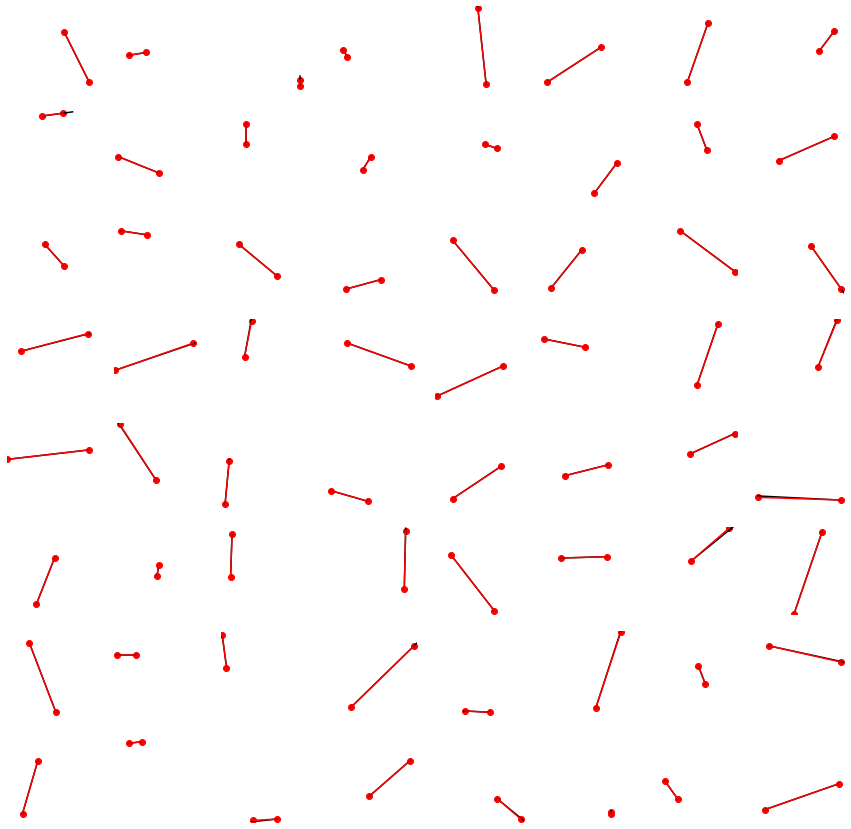

In [70]:
show_examples(model, 6)

In [24]:
# model.save('saved_models/mae_cnv32_avg_cnv64_avg_dns128_0_0060')

INFO:tensorflow:Assets written to: saved_models/mae_cnv32_avg_cnv64_avg_dns128_0_0060\assets


INFO:tensorflow:Assets written to: saved_models/mae_cnv32_avg_cnv64_avg_dns128_0_0060\assets


In [25]:
test = keras.models.load_model('models/mae_cnv32_avg_cnv64_avg_dns128_0_0060')

# Show the model architecture
test.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 average_pooling2d (AverageP  (None, 31, 31, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 14, 14, 64)       0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [26]:
eval_X, eval_y = preprocess(generate_dataset(10000))
model.evaluate(eval_X, eval_y)

625/625 [==============================] - 1s 2ms/step - loss: 0.0058


0.005799981765449047

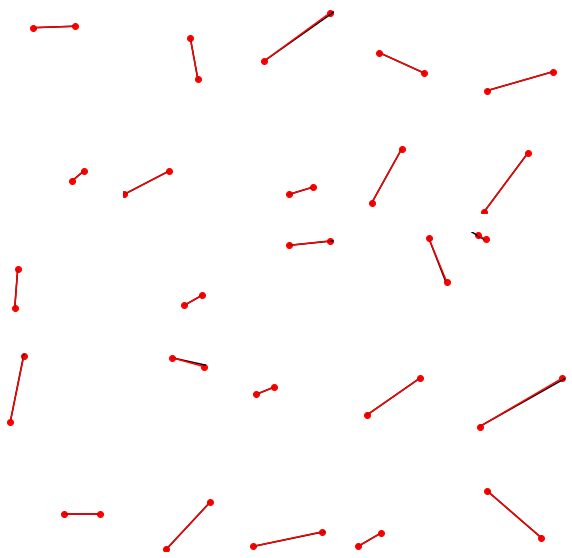

In [31]:
show_examples(test, 5)